# Fruit Data Building

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/fruit-dataset/fruit-dataset/train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5444 images belonging to 6 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/fruit-dataset/fruit-dataset/test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1676 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

227

In [ ]:
1238/24


51.583333333333336

In [18]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
227/227 [==============================] - 305s 1s/step - loss: 0.9332 - accuracy: 0.7853 - val_loss: 0.2518 - val_accuracy: 0.9183
Epoch 2/10
227/227 [==============================] - 160s 705ms/step - loss: 0.2471 - accuracy: 0.9135 - val_loss: 0.1810 - val_accuracy: 0.9338
Epoch 3/10
227/227 [==============================] - 160s 703ms/step - loss: 0.2097 - accuracy: 0.9285 - val_loss: 0.2083 - val_accuracy: 0.9254
Epoch 4/10
227/227 [==============================] - 160s 703ms/step - loss: 0.1902 - accuracy: 0.9357 - val_loss: 0.2557 - val_accuracy: 0.9248
Epoch 5/10
227/227 [==============================] - 160s 704ms/step - loss: 0.1416 - accuracy: 0.9513 - val_loss: 0.1894 - val_accuracy: 0.9409
Epoch 6/10
227/227 [==============================] - 154s 680ms/step - loss: 0.1344 - accuracy: 0.9533 - val_loss: 0.1036 - val_accuracy: 0.9684
Epoch 7/10
227/227 [==============================] - 157s 692ms/step - loss: 0.0982 - accuracy: 0.9693 - val_loss: 0.0908 - va

In [21]:
model.save('fruitdata.h2')

In [22]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('fruitdata.h2')

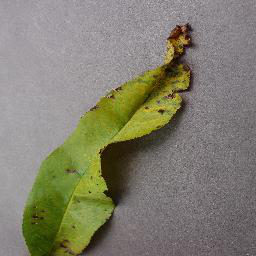

In [24]:
img=image.load_img(r"/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/00ec2d81-1ac8-464f-af9f-40e8c28d67eb___Rutg._Bact.S 2002.JPG")
img

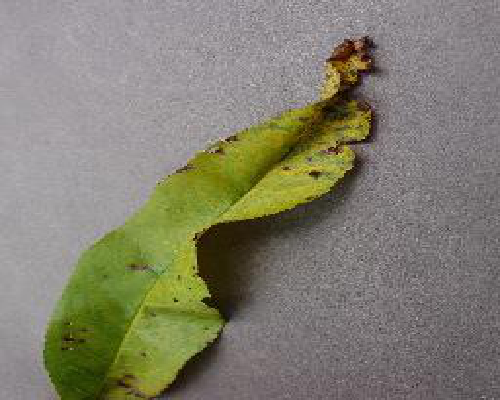

In [27]:
img=image.load_img(r"/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/00ec2d81-1ac8-464f-af9f-40e8c28d67eb___Rutg._Bact.S 2002.JPG",target_size=(400,500
                                                                                                                                                                                                                     ))
img

In [28]:
x=image.img_to_array(img)
x

array([[[158., 153., 159.],
        [158., 153., 159.],
        [155., 150., 156.],
        ...,
        [137., 131., 135.],
        [145., 139., 143.],
        [145., 139., 143.]],

       [[158., 153., 159.],
        [158., 153., 159.],
        [155., 150., 156.],
        ...,
        [137., 131., 135.],
        [145., 139., 143.],
        [145., 139., 143.]],

       [[160., 155., 161.],
        [160., 155., 161.],
        [158., 153., 159.],
        ...,
        [131., 125., 129.],
        [139., 133., 137.],
        [139., 133., 137.]],

       ...,

       [[143., 138., 142.],
        [143., 138., 142.],
        [145., 140., 144.],
        ...,
        [ 90.,  84.,  86.],
        [ 87.,  81.,  83.],
        [ 87.,  81.,  83.]],

       [[142., 137., 141.],
        [142., 137., 141.],
        [143., 138., 142.],
        ...,
        [ 98.,  92.,  94.],
        [108., 102., 104.],
        [108., 102., 104.]],

       [[142., 137., 141.],
        [142., 137., 141.],
        [143., 1

In [29]:
x=np.expand_dims(x,axis=0)
x

array([[[[158., 153., 159.],
         [158., 153., 159.],
         [155., 150., 156.],
         ...,
         [137., 131., 135.],
         [145., 139., 143.],
         [145., 139., 143.]],

        [[158., 153., 159.],
         [158., 153., 159.],
         [155., 150., 156.],
         ...,
         [137., 131., 135.],
         [145., 139., 143.],
         [145., 139., 143.]],

        [[160., 155., 161.],
         [160., 155., 161.],
         [158., 153., 159.],
         ...,
         [131., 125., 129.],
         [139., 133., 137.],
         [139., 133., 137.]],

        ...,

        [[143., 138., 142.],
         [143., 138., 142.],
         [145., 140., 144.],
         ...,
         [ 90.,  84.,  86.],
         [ 87.,  81.,  83.],
         [ 87.,  81.,  83.]],

        [[142., 137., 141.],
         [142., 137., 141.],
         [143., 138., 142.],
         ...,
         [ 98.,  92.,  94.],
         [108., 102., 104.],
         [108., 102., 104.]],

        [[142., 137., 141.],
       

In [30]:
x

array([[[[158., 153., 159.],
         [158., 153., 159.],
         [155., 150., 156.],
         ...,
         [137., 131., 135.],
         [145., 139., 143.],
         [145., 139., 143.]],

        [[158., 153., 159.],
         [158., 153., 159.],
         [155., 150., 156.],
         ...,
         [137., 131., 135.],
         [145., 139., 143.],
         [145., 139., 143.]],

        [[160., 155., 161.],
         [160., 155., 161.],
         [158., 153., 159.],
         ...,
         [131., 125., 129.],
         [139., 133., 137.],
         [139., 133., 137.]],

        ...,

        [[143., 138., 142.],
         [143., 138., 142.],
         [145., 140., 144.],
         ...,
         [ 90.,  84.,  86.],
         [ 87.,  81.,  83.],
         [ 87.,  81.,  83.]],

        [[142., 137., 141.],
         [142., 137., 141.],
         [143., 138., 142.],
         ...,
         [ 98.,  92.,  94.],
         [108., 102., 104.],
         [108., 102., 104.]],

        [[142., 137., 141.],
       

In [38]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 43ms/step


In [33]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [34]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [36]:
img=image.load_img(r"/content/drive/MyDrive/DATA COLLECTION/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/011d02f3-5c3c-4484-a384-b1a0a0dbdec1___RS_HL 7544.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 163ms/step


'Apple___Black_rot'

In [37]:
index[y[0]]

'Apple___Black_rot'